In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1
In this problem, we will examine an interest rate payer swap where payments to the floating leg are more frequent than payments to the fixed leg. Assume that we consider an interest rate swap that pays coupons of size $ R $ to the fixed leg $ I $ times a year, pays simple LIBOR rate coupons to the floating leg $ J $ times a year, matures in exactly $ N $ years, and has a principal of $ K $. Also assume that $ M = \frac{J}{I} $ and $ N $ are positive integers. If it helps, you can think of $ I = 2 $, $ J = 4 $, and $ N = 10 $.

Initially, we will consider the interest rate swap at time of issuance at $( t = T_0 = 0 )$. Denote the times of coupon payments to the floating leg by $ T_1, T_2, \dots, T_{JN} $, corresponding to fixings announced at times $( T_0, T_1, \dots, T_{JN−1} )$, and denote the LIBOR rate announced at time $ T_i $ to be paid at time $ T_{i+1} $ by $ L(T_i, T_{i+1}) $. Finally, we assume that zero coupon bond prices $ p(t, T) $ are available for all $ T \geq 0 $.


##### (a) Find an expression for the value of the fixed leg.
The present value of the fixed leg ignoring repayment of the principal is
$$
P_{\text{fixed}} = K R \sum_{i=1}^{I \cdot N} p(t, T_{iM})(T_{iM} - T_{(i-1)M}) = S_0 R K
$$

##### (b) Find an expression for the value of the floating leg.
The present value of the floating leg ignoring repayment of the principal is
\begin{align*}
P_{\text{float}} &= \sum_{i=1}^{J\cdot N} p(t,T_i)(T_i-T_{i-1})L(T_{(i-1)},T_i)K \\ 
&= \sum_{i=1}^{J\cdot N} K[p(t,T_{i-1})p(t,T_i)L(T_{(i-1)},T_i)] \\ 
&= K [p(t,T_0) - p(t,T_{JN})]
\end{align*}

##### (c) Find an expression for the par swap rate and identify for each of the elements of the expression, if they originate from the fixed or the floating leg.
The par swap rate then can be found by setting $PV_{float} − PV_{fixed} = 0$
$$
R^*_0 = \frac{p(t,T_0) - p(t, T_{JN})}{\sum_{i=1}^{I \cdot N} p(t, T_i)(T_{iM}-T_{(i-1)M})}
$$
The numerator comes from the floating leg, and the denominator comes from the fixed leg.

##### (d) Find an expression for the accrual factor and identify for each of the elements of the expression, if they originate from the fixed or the floating leg.
The accrual factor, $S_0$ is the denominator of the par swap rate and comes solely from the fixed leg
$$
S_0 = \sum_{i=1}^{I \cdot N} p(t, T_{iM})(T_{iM} - T_{(i-1)M})
$$

##### (e) Compare the par swap rate and the accrual factor you found to the case where coupons to both the fixed and floating legs occur at the same time.
The par swap rate and the accrual factors are essentially the same whether or not the cash flows to the fixed and floating legs occur simultaneously or not.

---

Now assume that some time has passed and that $ t $ is in-between coupon dates on the floating leg. Specifically, assume that a little more than one year has passed, so that $ T_J < t < T_{J+1} $. The question is now slightly complicated by the fact that the fixing at time $ T_J $ has already been announced and that the coupon $ L(T_J , T_{J+1}) $ to the floating leg at time $ T_{J+1} $ is already known.

##### (f) Find an expression for the value of the fixed leg.
Now that time has passed, the first payment to the fixed leg occurs at time J + M and the values of the floating leg becomes
$$
P_{\text{fixed}} = K R \sum_{i=(J/M)+1}^{I \cdot N} p(t, T_{iM})(T_{iM} - T_{(i-1)M}) = S_t R K
$$

##### (g) Find an expression for the value of the floating leg.
The floating leg is now a bit different since we have to take into account the fixing and corresponding
cash flow announced at time $T_J$
\begin{align*}
P_{\text{float}} &= \sum_{i=J+1}^{J\cdot N} p(t,T_i)(T_i-T_{i-1})L(T_{(i-1)},T_i)K \\ 
&= p(t,T_{J+1})(T_{J+1}-T_J)L(T_{J},T_{J+1})K + \sum_{i=J+2}^{J\cdot N} K[p(t,T_{i-1})-p(t,T_i)] \\
&= p(t,T_{J+1})(T_{J+1}-T_J)L(T_{J},T_{J+1})K + K[p(t,T_{J+1})-p(t,T_{JN})] \\
&= K(T_{J+1}-T_J) \times (\text{ZCB price of float coupon recieved at } T_{J+1}) \\ 
&\qquad \times (\text{Floating coupon received at } T_{J+1}) \\
&\qquad + K \times (\text{ZCB price } T= \text{time of first fixing after t}) \\
&\qquad - K\times (\text{ZCB price } T= \text{time of last cash flow floating leg after t})
\end{align*} 

##### (h) Find an expression for the par swap rate and the accrual factor.
The par swap rate is yet again found be setting $PV_{float} − PV_{fixed} = 0$ but now also accounts for the floating coupon received at time $T_{J+1}$
$$
R_t^* = \frac{p(t,T_{J+1})(T_{J+1}-T_J)L(T_J,T_{J+1}) + p(t,T_{J+1})-p(t,T_{JN})}{\sum_{i=(J/M)+1}^{I \cdot N} p(t, T_{iM})(T_{iM}-T_{(i-1)M})}
$$

The accrual factor St still depends solely on the fixed leg and stems from the denominator of the
par swap rate

$$
S_t = \sum_{i=(J/M)+1}^{I \cdot N} p(t, T_{iM})(T_{iM}-T_{(i-1)M})
$$

##### (i) Find an expression for the PnL of the payer swap. Does the expression for the PnL depend on $ L(T_J , T_{J+1}) $?
The PnL of the payer swap becomes
\begin{align*}
\text{PnL} &= p(t,T_{J+1})(T_{J+1}-T_J)L(T_J,T_{J+1})K + K[p(t,T_{J+1})-p(t,T_{JN})] \\ 
&\qquad - \sum_{i=(J/M)+1}^{I \cdot N} p(t, T_{iM})(T_{iM}-T_{(i-1)M})R_0^* K \\
&= S_t K (R_t^* - R_0^*)
\end{align*}
The PnL of the payer swap depends on the principal $K$, the accrual factor $S_t$ and the change in the par swap rate. But the PnL does not depend on the first cash flow to the floating leg that was decided at time $T_J < t$ and received at time $T_{J+1}$. This means that to compute the PnL of a an interest rate swap, all we need is the par swap at time of issuance, $t = 0$, the accrual factor at time $t$ and the par swap rate at time $t$.

---


## Problem 2

For this problem, assume for simplicity that the year consists of 12 months each with exactly 30 days and that all payments occur at the end of day on the last day of the month. Also assume that there is no credit risk and that the principal of all bonds is 100.

The date today is December 30 2019, the last day of the year, and the BBA have just at 11 AM announced the 3M LIBOR fixing to be 0.01472717 and the 6M LIBOR fixing to be 0.01893706. In addition, the following bonds are traded in the market.

- i) A 3 year fixed rate bullet bond maturing December 30 2020 paying quarterly simple coupons of 4% annually and a price of 102.33689177.
- ii) A 5 year fixed rate bullet bond maturing December 30 2020 paying semi-annual simple coupons of 5% annually and a price of 104.80430234.
- iii) A 10 year fixed rate bullet bond maturing June 30 2021 paying semi-annual simple coupons of 5% annually and a price of 105.1615306.
- iv) An 8 year fixed rate bullet bond maturing June 30 2021 paying quarterly simple coupons of 6% annually and a price of 105.6581905.
- v) A 5 year fixed rate bullet bond maturing December 30 2021 paying quarterly simple coupons of 5% annually and a price of 104.028999992.
- vi) A 30 year fixed rate bullet bond maturing December 30 2021 paying annual simple coupons of 3% annually and a price of 101.82604116.

#### (a) Set up the cashflow matrix corresponding to this information.

In [2]:
# no. of bonds, no. of payments
N, M = 6, 9

# principal
K = 100 

# time in years
ttm = np.array([0,0.25,0.5,0.75,1,1.25,1.5,1.75,2])

# libor rates
# L_3M, L_6M = 0.01472717, 0.01893706 # rates listed in the problem set
L_3M, L_6M = 0.01570161, 0.01980204 # rates used in the solution


# cash flow matrix for bonds
cash_flow = np.zeros([N,M])
# interest payment (%) X principal X payments annually
cash_flow[0,:] = [0.04*K*0.25,0.04*K*0.25,0.04*K*0.25,0.04*K*0.25,0.04*K*0.25+K,0,0,0,0]
cash_flow[1,:] = [0.05*K*0.5,0,0.05*K*0.5,0,0.05*K*0.5+K,0,0,0,0]
cash_flow[2,:] = [0.05*K*0.5,0,0.05*K*0.5,0,0.05*K*0.5,0,0.05*K*0.5+K,0,0]
cash_flow[3,:] = [0.06*K*0.25,0.06*K*0.25,0.06*K*0.25,0.06*K*0.25,0.06*K*0.25,0.06*K*0.25,0.06*K*0.25+K,0,0]
cash_flow[4,:] = [0.05*K*0.25,0.05*K*0.25,0.05*K*0.25,0.05*K*0.25,0.05*K*0.25,0.05*K*0.25,0.05*K*0.25,0.05*K*0.25,0.05*K*0.25+K]
cash_flow[5,:] = [0.03*K*1,0,0,0,0.03*K*1,0,0,0,0.03*K*1+K]

# LIBOR cash flow matrix
cash_flow_libor = np.zeros([3,M])
cash_flow_libor[0,:] = [1, 0,0,0,0,0,0,0,0]
cash_flow_libor[1,:] = [0, 1+L_3M/4,0,0,0,0,0,0,0]
cash_flow_libor[2,:] = [0, 0,1+L_6M/2,0,0,0,0,0,0]

# price of bonds
pi = np.array([102.33689177,104.80430234,105.1615306,105.6581905,104.02899992,101.82604116])

#### (b) Find the vector of zero coupon prices for all the times that you can based on the above information, and find the term structure of continuously compounded zero coupon spot rates (the yield curve). Report the results and plot both curves in an appropriate diagram.

In [3]:
# set up vectors
p, r = np.ones([M]), np.zeros([M])

# set up vectors for the solution
p[1], p[2] = 1/(1+L_3M*ttm[1]), 1/(1+L_6M*ttm[2])

y = pi-p[0]*cash_flow[:,0]-p[1]*cash_flow[:,1]-p[2]*cash_flow[:,2]

x = cash_flow[:,3:]

p[3:M] = np.linalg.solve(x,y)

# calculate the forward rates
for i in range(1,M):
    r[i] = -np.log(p[i])/ttm[i]

In [4]:
print("The bond prices are: ", p)
print("The spot rates are: ", r)

The bond prices are:  [1.         0.99608995 0.99019605 0.982703   0.97393963 0.96418421
 0.95367016 0.94259166 0.93110895]
The spot rates are:  [0.         0.01567087 0.01970465 0.02326445 0.02640596 0.02917833
 0.03162494 0.03378407 0.03568949]


#### (c) Find 3M forward rates and plot these in the diagram from (b).

In [5]:
f_3M = np.zeros([M])
f_3M[0] = r[0]
for i in range(1,M):
    f_3M[i] = -(np.log(p[i])-np.log(p[i-1]))/(ttm[i]-ttm[i-1])

In [6]:
print("The 3M forward rates are: ", f_3M)

The 3M forward rates are:  [0.         0.01567087 0.02373843 0.03038404 0.03583049 0.04026783
 0.04385799 0.04673881 0.04902746]


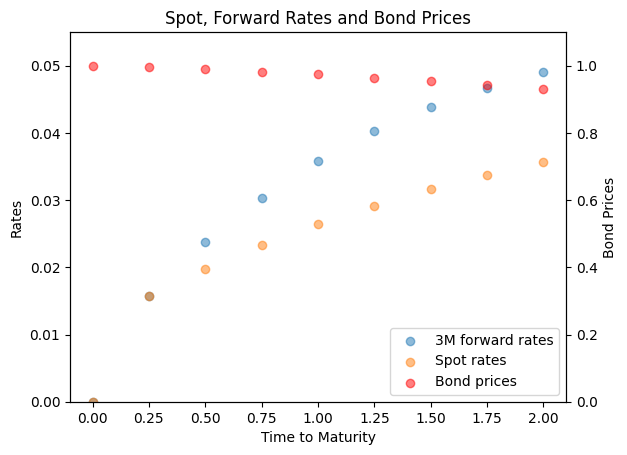

In [21]:
# Plot spot and forward rates
fig, ax1 = plt.subplots()

scatter1 = ax1.scatter(ttm, f_3M, label='3M forward rates', alpha=0.5)
scatter2 = ax1.scatter(ttm, r, label='Spot rates', alpha=0.5)
ax1.set_ylim([0, 0.055])
ax1.set_xlabel('Time to Maturity')
ax1.set_ylabel('Rates')

# Add bond prices to the plot on the right axis
ax2 = ax1.twinx()
scatter3 = ax2.scatter(ttm, p, label='ZCB prices', color='red', alpha=0.5)
ax2.set_ylim([0, 1.1])
ax2.set_ylabel('Bond Prices')

# Combine legends
scatters = [scatter1, scatter2, scatter3]
labels = [scatter.get_label() for scatter in scatters]
ax1.legend(scatters, labels, loc='lower right')

plt.title('Spot, Forward Rates and Bond Prices')
plt.show()


#### (d) Find the price of a 2-year floating rate bullet note with principal 100 paying 6M LIBOR issued today.
The price of a newly issued floating rate bond will always be equal to the principal, here $K = 100$.


In [ ]:
pi_float = K*p[0]

#### (e) Find the par swap rate for a 2-year interest rate swap paying semi-annual fixed coupons at an annual rate $ R $ to the receiver and quarterly 3M LIBOR to the payer issued today.

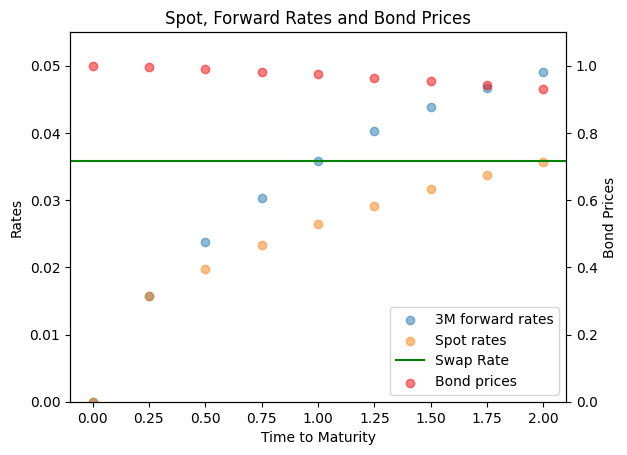

In [29]:
# semiannual payment i.e. in periods 0.5, 1, 1.5, 2
R = (1-p[8])/(0.5*(p[2]+p[4]+p[6]+p[8]))

# Plot spot and forward rates
fig, ax1 = plt.subplots()

scatter1 = ax1.scatter(ttm, f_3M, label='3M forward rates', alpha=0.5)
scatter2 = ax1.scatter(ttm, r, label='Spot rates', alpha=0.5)
ax1.set_ylim([0, 0.055])
ax1.set_xlabel('Time to Maturity')
ax1.set_ylabel('Rates')

# Add bond prices to the plot on the right axis
ax2 = ax1.twinx()
scatter3 = ax2.scatter(ttm, p, label='ZCB prices', color='red', alpha=0.5)
ax2.set_ylim([0, 1.1])
ax2.set_ylabel('Bond Prices')

# adding swap rate for 2-year interest rate swap
line = ax1.axhline(y=R, color='green', linestyle='-', label='Swap Rate')

# Combine legends
scatters = [scatter1, scatter2, line, scatter3]
labels = [scatter.get_label() for scatter in scatters]
ax1.legend(scatters, labels, loc='lower right')

plt.title('Spot, Forward Rates and Bond Prices')
plt.show()

#### (f) Compare the par swap rate to the forward rates you computed in (c).
The par swap rate is a weighted average of the forward rates on the floating leg which in this case is the 3M forward rates computed and shown in the plot above.

---

Time now passes and the date becomes January 30. 2020. From a god friend you now know that the price of zero coupon bond maturing on March 30. 2020 is $0.99699147$ and that the price of a zero coupon bond maturing on June 30. 2020 is $0.99088748$. Also assume that the two corresponding ZCB
bonds can be constructed and traded. Due to market fluctuations, the prices of the bonds i)-vi) are
now $[101.37241234, 102.33995192, 102.66601781, 104.16399942, 102.75471174, 98.79916103]$ and the price of the
receiver swap from e) is now $−0.1161878302683732$

In [31]:
T_new = np.zeros([M])
T_new[1:] = ttm[1:] - 1/12
C_new = np.zeros([N,M])
C_new[:,1:] = cash_flow[:,1:]
pi_new = np.array([101.98667646,102.96333877,102.68122237,104.17312216,102.76231402,98.8174065])
p_0_2M_new, p_0_5M_new = 0.99699147, 0.99088748
pi_swap_new = 0.02515099

#### (g) Set up a system of equations including the interest rate swap to compute zero coupon bond prices.

In [32]:
C_swap = np.array([0,-0.25*K*L_3M-K,0.5*R*K,0,0.5*R*K,0,0.5*R*K,0,0.5*R*K+K])

print("The cash flows for the swap are: ", C_swap)

The cash flows for the swap are:  [   0.         -100.39254025    1.78988233    0.            1.78988233
    0.            1.78988233    0.          101.78988233]


#### (h) Solve this system of equations to find zero coupon bond prices, zero coupon bond rates, and 3M forward rates as you did in (b), and plot these.

In [33]:
p_new = np.ones([M])
p_new[0], p_new[1], p_new[2] = 1, p_0_2M_new, p_0_5M_new
C_new = np.vstack([C_new,C_swap])
y = np.hstack([pi_new,pi_swap_new]) - p_new[1]*C_new[:,1] - p_new[2]*C_new[:,2]
x = C_new[:,3:]
p_new[3:] = np.linalg.solve(np.matmul(np.transpose(x),x),np.matmul(np.transpose(x),y))
r_new, f_3M_new = np.zeros([M]), np.zeros([M])
f_3M_new[0] = np.nan
for i in range(1,M):
    r_new[i] = -np.log(p_new[i])/T_new[i]
    f_3M_new[i] = -(np.log(p_new[i])-np.log(p_new[i-1]))/(T_new[i]-T_new[i-1])


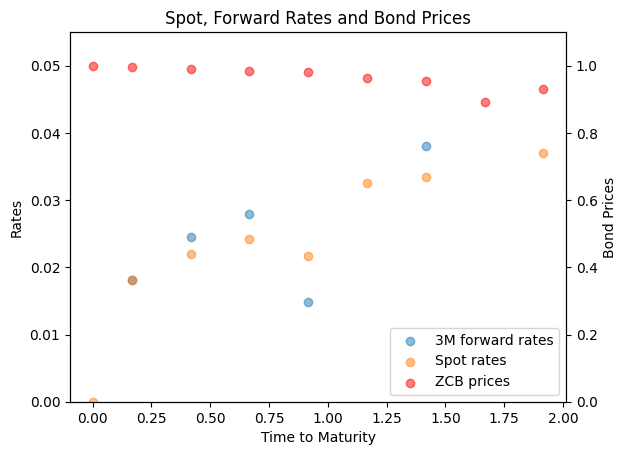

In [35]:
# Plot spot and forward rates
fig, ax1 = plt.subplots()

scatter1 = ax1.scatter(T_new, f_3M_new, label='3M forward rates', alpha=0.5)
scatter2 = ax1.scatter(T_new, r_new, label='Spot rates', alpha=0.5)
ax1.set_ylim([0, 0.055])
ax1.set_xlabel('Time to Maturity')
ax1.set_ylabel('Rates')

# Add bond prices to the plot on the right axis
ax2 = ax1.twinx()
scatter3 = ax2.scatter(T_new, p_new, label='ZCB prices', color='red', alpha=0.5)
ax2.set_ylim([0, 1.1])
ax2.set_ylabel('Bond Prices')

# Combine legends
scatters = [scatter1, scatter2, scatter3]
labels = [scatter.get_label() for scatter in scatters]
ax1.legend(scatters, labels, loc='lower right')

plt.title('Spot, Forward Rates and Bond Prices')
plt.show()

---

Now instead assume that the price of the zero coupon bond maturing on March 30. 2020 is $0.99391543$,
that the price of a zero coupon bond maturing on June 30. 2020 is $0.98379379$, that the prices of the
6 bonds are $[100.00015573, 100.95055325, 100.77535024, 100.26763545, 100.48419302, 96.56064083]$ and that the
price of the receiver swap is $−2.04869321$.

#### (i) Check that the market is arbitrage-free.

Since we are now in a situation where we have more assets and thus restrictions than we have free parameters, and the ZCB prices have to be estimated. This is certainly not implausible in practice and if the market is well-behaved, we should be able to recover the unique ZCB prices used to price the assets. In this case, we see that ZCB prices are positive and since the residuals $\pi−C\hat{p}$ are small, we conclude that the market is arbitrage free.

#### (j) Use OLS to estimate the zero coupon bond prices from market data.

#### (k) Is the market arbitrage free? Try to find an arbitrage opportunity.